## Question 5

first i added data to my google drive and then mount it with colab. next i define the path to the folder containing the 8 subfolders.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/data_train'

in this part, at first I imported useful modules and then extracted the data to numpy array. by using 'tf.keras.preprocessing.image.ImageDataGenerator' and 'flow_from_directory' I was able to normalize the data, change the pictures into grayscale mode, change the size of the pictures. I also could split the training data into the training and validation part, it will take thavalidation data froom each folder after shuffling them. there is also a batch size argument which will use fo controlling the training process in the following. I use the validation data as test data as well.

In [97]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from matplotlib import pyplot as plt
from keras.models import load_model
import tensorflow as tf
from keras import regularizers

In [21]:
image_size = (98, 128)
num_classes = 8
batch_size = 256
# extracting the pictures, preprocessing them and splitting them into train, validation and test groups.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
# training
train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    color_mode='grayscale',
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)
# validation
validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    color_mode='grayscale',
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)
# testing
test_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    color_mode='grayscale',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False,
    subset = 'validation'
)

Found 1129 images belonging to 8 classes.
Found 280 images belonging to 8 classes.
Found 280 images belonging to 8 classes.


in this part I printed some random pictures to see if there has been extracted correctly.

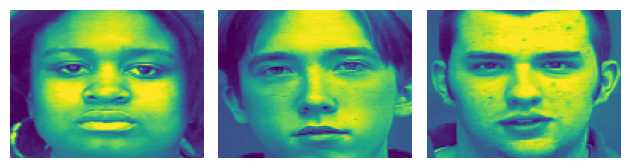

In [6]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,3)
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

imgs, labels = train_batches[0]
plotImages(imgs)

for using data as inputs of a MLP model, I should flattened each picture and reshaped them to a 1_D array.

In [22]:
# Flatten the image data for all batches
x_train_flattened = None

for i in range(len(train_batches)):
    batch_images = train_batches[i][0]
    batch_flattened = np.reshape(batch_images, (batch_images.shape[0], -1))

    if x_train_flattened is None:
        x_train_flattened = batch_flattened
    else:
        x_train_flattened = np.concatenate((x_train_flattened, batch_flattened))

# Print the shape of the flattened image data
print('Flattened image data shape:', x_train_flattened.shape)

Flattened image data shape: (1129, 12544)


In [23]:
# Flatten the image data for all batches
x_val_flattened = None

for i in range(len(validation_batches)):
    batch_images = validation_batches[i][0]
    batch_flattened = np.reshape(batch_images, (batch_images.shape[0], -1))

    if x_val_flattened is None:
        x_val_flattened = batch_flattened
    else:
        x_val_flattened = np.concatenate((x_val_flattened, batch_flattened))

# Print the shape of the flattened image data
print('Flattened image data shape:', x_val_flattened.shape)

Flattened image data shape: (280, 12544)


In [24]:
# Flatten the image data for all batches
x_test_flattened = None

for i in range(len(validation_batches)):
    batch_images = validation_batches[i][0]
    batch_flattened = np.reshape(batch_images, (batch_images.shape[0], -1))

    if x_test_flattened is None:
        x_test_flattened = batch_flattened
    else:
        x_test_flattened = np.concatenate((x_test_flattened, batch_flattened))

# Print the shape of the flattened image data
print('Flattened image data shape:', x_test_flattened.shape)

Flattened image data shape: (280, 12544)


in the following I converted the labels to one hot format. and in the first part, you can see each labels, with their corresponding one hot format.

In [25]:
# Get the class indices
class_indices = train_batches.class_indices

# Define the labels for the image data
y_train = train_batches.classes

# Convert the labels to one-hot encoded vectors
y_train_encoded = keras.utils.to_categorical(y_train, num_classes=num_classes)

# Map indices to class names
idx_to_class = {v: k for k, v in class_indices.items()}

# Find unique labels
unique_labels = np.unique(y_train)

# Print unique labels, class names, and one-hot encoded labels
for label in unique_labels:
    class_name = idx_to_class[label]
    one_hot_label = y_train_encoded[np.where(y_train == label)[0][0]]  # Get one-hot label for the first occurrence of the label
    print(f"Unique Label: {label}, Class Name: {class_name}, One-Hot Label: {one_hot_label}")


Unique Label: 0, Class Name: Angry, One-Hot Label: [1. 0. 0. 0. 0. 0. 0. 0.]
Unique Label: 1, Class Name: Contempt, One-Hot Label: [0. 1. 0. 0. 0. 0. 0. 0.]
Unique Label: 2, Class Name: Disgust, One-Hot Label: [0. 0. 1. 0. 0. 0. 0. 0.]
Unique Label: 3, Class Name: Fear, One-Hot Label: [0. 0. 0. 1. 0. 0. 0. 0.]
Unique Label: 4, Class Name: Happy, One-Hot Label: [0. 0. 0. 0. 1. 0. 0. 0.]
Unique Label: 5, Class Name: Neutral, One-Hot Label: [0. 0. 0. 0. 0. 1. 0. 0.]
Unique Label: 6, Class Name: Sadness, One-Hot Label: [0. 0. 0. 0. 0. 0. 1. 0.]
Unique Label: 7, Class Name: Surprise, One-Hot Label: [0. 0. 0. 0. 0. 0. 0. 1.]


In [26]:
# Define the labels for the image data
y_val = validation_batches.classes

# Convert the labels to one-hot encoded vectors
y_val_encoded = keras.utils.to_categorical(y_val, num_classes = num_classes)

In [27]:
# Define the labels for the image data
y_test = test_batches.classes

# Convert the labels to one-hot encoded vectors
y_test_encoded = keras.utils.to_categorical(y_test, num_classes=num_classes)

## Training Model

In [79]:
epochs = 200

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(12544,)))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train_flattened, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val_flattened, y_val_encoded))

# evaluating
score = model.evaluate(x_test_flattened, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               1605760   
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 8)                 520       
                                                                 
Total params: 1614536 (6.16 MB)
Trainable params: 1614536 (6.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 3s 290ms/step - loss: 2.1415 - accuracy: 0.1089 - val_loss: 2.1272 - val_accuracy: 0.1000
Epoch 2/200
5/5 [==============================] - 1s 128ms/step - loss: 2.0815 - accuracy: 0.1293 - val_loss: 2.0685 - val_accuracy: 0.12

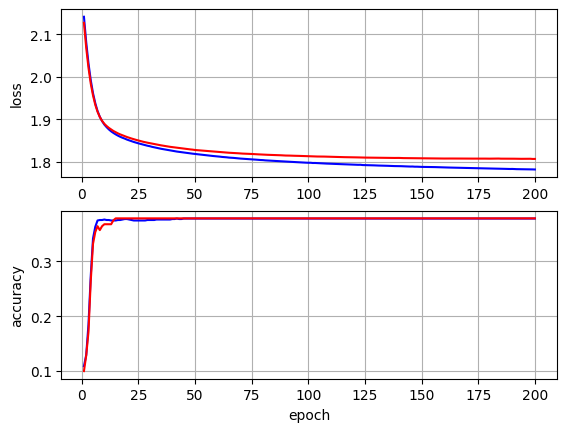

In [80]:
# plotting the loss and accuraacy per epoch
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b',
         range(1,epochs+1), history.history['val_loss'],'r')
plt.ylabel('loss')
plt.grid()
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b',
         range(1,epochs+1), history.history['val_accuracy'],'r')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('epoch')
plt.show()

In [81]:
model.save('model_HW1_5_2.h5')

## Loading

in this part I loaded two of my models and I also printed some of the weights as picture; as you can see there is some scary faces between them :)

I wasn't able to build a model with accuracy more than 37%. and as the accuracy on train data increase, the model started to overfitting.

### first model

In [98]:
model = load_model('model_HW1_5_1.h5')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               1605760   
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 8)                 264       
                                                                 
Total params: 1616360 (6.17 MB)
Trainable params: 1616

In [100]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.80670964717865
Test accuracy: 0.37857142090797424


1/1 [==============================] - 0s 91ms/step


array([[0.00742327, 0.00109542, 0.06737018, 0.00674164, 0.07000329,
        0.77980506, 0.00718079, 0.06038034]], dtype=float32)

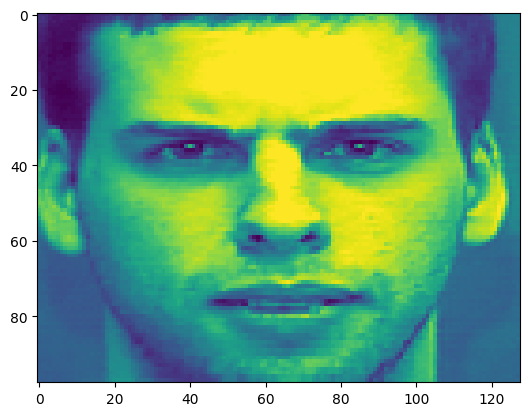

In [101]:
my_test_id=10
plt.imshow(x_test_flattened[my_test_id].reshape(98, 128))
model.predict(x_test_flattened[my_test_id].reshape(1,12544))

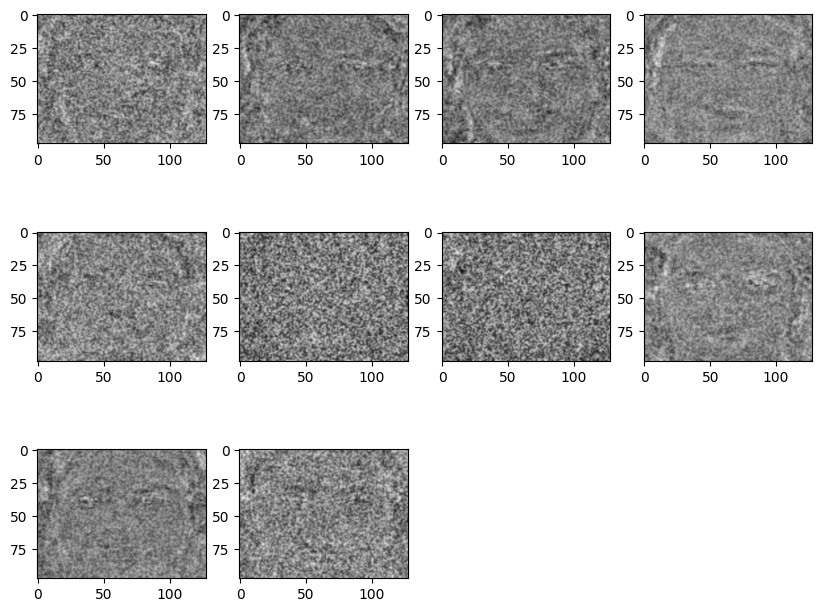

In [102]:
seed = 10
plt.figure(figsize=(10, 8), dpi=100)
for i in range(10):
  random=np.random.randint(0, 127, size=1)
  weights=model.layers[0].weights[0][:,random[0]].numpy()
  weights=weights.reshape(98,128)
  plt.subplot(3, 4, i+1)
  plt.imshow(weights,cmap='gray',interpolation='bicubic')

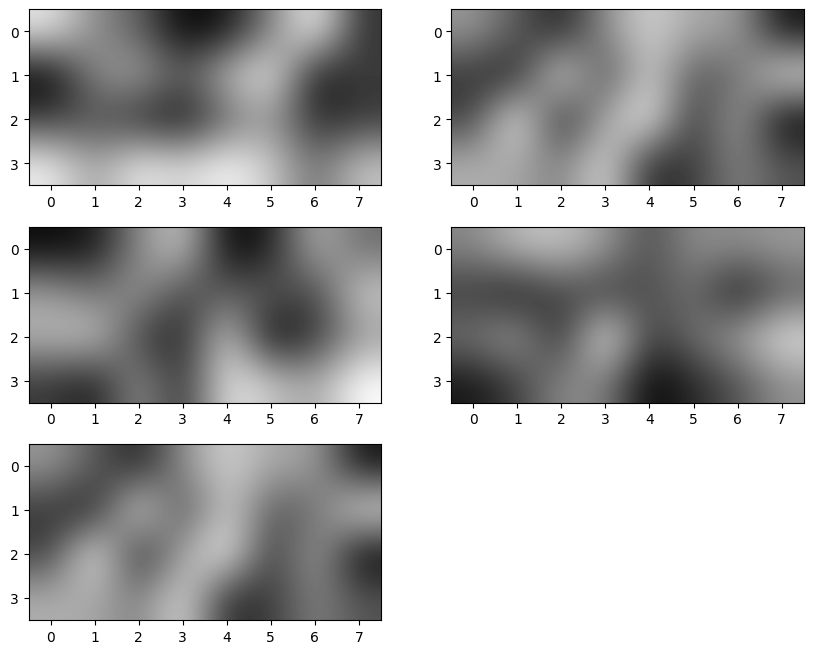

In [103]:
plt.figure(figsize=(10, 8), dpi=100)
for i in range(5):
  random=np.random.randint(0, 7, size=1)
  weights=model.layers[-1].weights[0][:,random[0]].numpy()
  weights=weights.reshape(4,8)
  plt.subplot(3, 2, i+1)
  plt.imshow(weights,cmap='gray',interpolation='bicubic')

### second model

In [104]:
model = load_model('model_HW1_5_2.h5')
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               1605760   
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 8)                 520       
                                                                 
Total params: 1614536 (6.16 MB)
Trainable params: 1614536 (6.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.80670964717865
Test accuracy: 0.37857142090797424


1/1 [==============================] - 0s 83ms/step


array([[0.12826379, 0.02599995, 0.08398125, 0.05114738, 0.17415245,
        0.30673307, 0.034747  , 0.19497508]], dtype=float32)

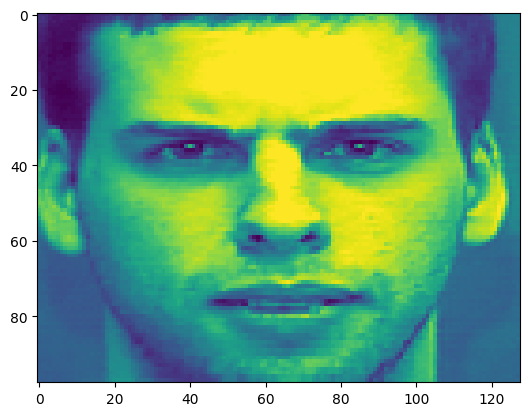

In [107]:
my_test_id=10
plt.imshow(x_test_flattened[my_test_id].reshape(98, 128))
model.predict(x_test_flattened[my_test_id].reshape(1,12544))

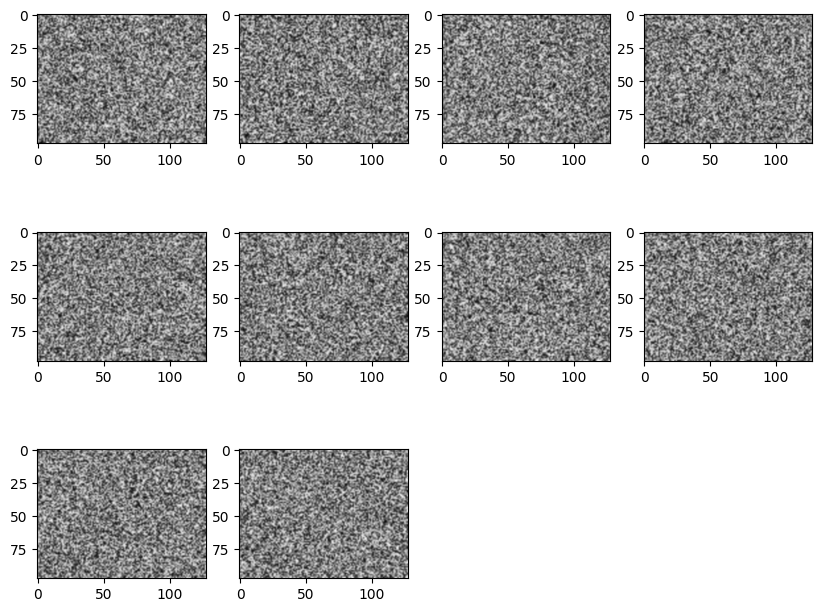

In [108]:
seed = 123456789
plt.figure(figsize=(10, 8), dpi=100)
for i in range(10):
  random=np.random.randint(0, 127, size=1)
  weights=model.layers[0].weights[0][:,random[0]].numpy()
  weights=weights.reshape(98,128)
  plt.subplot(3, 4, i+1)
  plt.imshow(weights,cmap='gray',interpolation='bicubic')

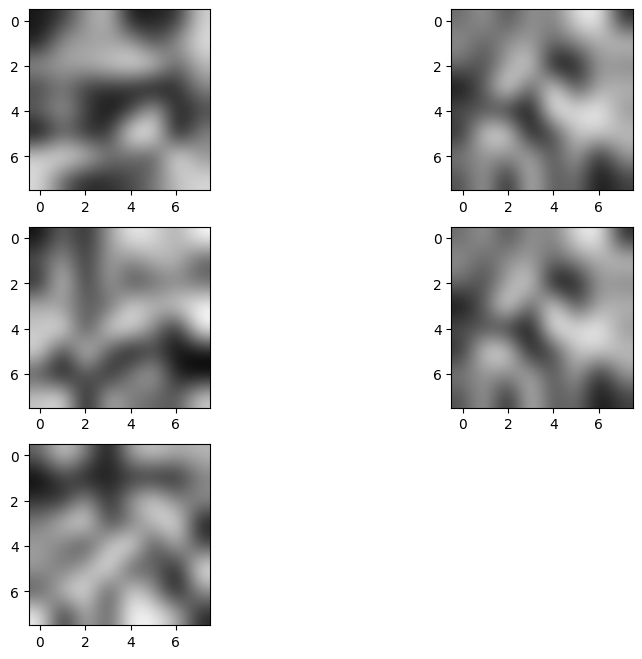

In [109]:
plt.figure(figsize=(10, 8), dpi=100)
for i in range(5):
  random=np.random.randint(0, 7, size=1)
  weights=model.layers[-1].weights[0][:,random[0]].numpy()
  weights=weights.reshape(8,8)
  plt.subplot(3, 2, i+1)
  plt.imshow(weights,cmap='gray',interpolation='bicubic')

# sites

https://colab.research.google.com/drive/14TxkjY7qCcCMwRxEhqFvfHOoHhCDoQ3u#scrollTo=Ea3kbMe-pGDw

https://keras.io/api/data_loading/image/

https://stackoverflow.com/questions/70080062/how-to-correctly-use-imagedatagenerator-in-keras

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720



